In [401]:
import numpy
import pandas
import numpy as np
pd = pandas

In [402]:
passing_data = pandas.read_csv("./2020_Problem_D_DATA/passingevents.csv")

In [403]:
passing_data.head()

,MatchID,TeamID,OriginPlayerID,DestinationPlayerID,MatchPeriod,EventTime,EventSubType,EventOrigin_x,EventOrigin_y,EventDestination_x,EventDestination_y
0,1,Huskies,Huskies_D1,Huskies_F1,1H,46.323501,Head pass,34,97,59.0,95.0
1,1,Huskies,Huskies_M1,Huskies_F2,1H,51.022546,Simple pass,53,89,69.0,91.0
2,1,Opponent1,Opponent1_D2,Opponent1_G1,1H,89.008721,Simple pass,19,16,5.0,50.0
3,1,Opponent1,Opponent1_G1,Opponent1_F1,1H,92.216160,Launch,5,50,67.0,44.0
4,1,Huskies,Huskies_M2,Huskies_M3,1H,98.265191,Simple pass,42,55,36.0,54.0


# Centroid coordinates and dispersion

## long

In [404]:
passing_data

,MatchID,TeamID,OriginPlayerID,DestinationPlayerID,MatchPeriod,EventTime,EventSubType,EventOrigin_x,EventOrigin_y,EventDestination_x,EventDestination_y
0,1,Huskies,Huskies_D1,Huskies_F1,1H,46.323501,Head pass,34,97,59.0,95.0
1,1,Huskies,Huskies_M1,Huskies_F2,1H,51.022546,Simple pass,53,89,69.0,91.0
2,1,Opponent1,Opponent1_D2,Opponent1_G1,1H,89.008721,Simple pass,19,16,5.0,50.0
3,1,Opponent1,Opponent1_G1,Opponent1_F1,1H,92.216160,Launch,5,50,67.0,44.0
4,1,Huskies,Huskies_M2,Huskies_M3,1H,98.265191,Simple pass,42,55,36.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...
23424,38,Opponent14,Opponent14_M3,Opponent14_D1,2H,2758.973892,Simple pass,57,56,65.0,63.0
23425,38,Opponent14,Opponent14_D1,Opponent14_D6,2H,2760.286946,Simple pass,65,63,61.0,96.0
23426,38,Opponent14,Opponent14_D6,Opponent14_M4,2H,2763.698599,Simple pass,61,96,40.0,85.0
23427,38,Opponent14,Opponent14_M4,Opponent14_M2,2H,2783.137836,Simple pass,59,70,53.0,89.0


In [405]:
ppd = passing_data.loc[:, ['TeamID', 'OriginPlayerID', 'EventOrigin_x', 'EventOrigin_y']]
ppd = ppd[ppd['TeamID'].isin(['Huskies'])]

In [406]:
X_mean, Y_mean = ppd[['EventOrigin_x', 'EventOrigin_y']].mean()

In [407]:
pomd = ppd.groupby('OriginPlayerID').mean()

In [408]:
pomd['distance'] = [((x - X_mean)**2 + (y - Y_mean)**2)**0.5 for x,y in zip(pomd['EventOrigin_x'],pomd['EventOrigin_y'])]

In [409]:
pomd

,EventOrigin_x,EventOrigin_y,distance
OriginPlayerID,,,
Huskies_D1,34.297297,54.083431,13.485088
Huskies_D10,37.184211,21.973684,29.489998
Huskies_D2,34.743103,45.163793,13.154692
Huskies_D3,35.467675,51.566713,11.742218
Huskies_D4,50.718805,12.525483,37.410368
Huskies_D5,48.324800,34.862400,14.947839
Huskies_D6,39.319876,75.639752,27.017638
Huskies_D7,51.115196,82.735294,33.225057
Huskies_D8,51.996198,86.798479,37.367211


In [410]:
pomd.std()[2]

10.178254872596563

In [411]:
centroid_coordinates_and_dispersion = pd.DataFrame({'Centroid coordinates':[(X_mean, Y_mean)], 'dispersion':pomd.std()[2]})

In [412]:
centroid_coordinates_and_dispersion.to_csv("./results/long/centroid_coordinates_and_dispersion.csv")

# Clustering coefficient

## long

In [413]:
pure_passing_data = passing_data.loc[:, ['TeamID', 'OriginPlayerID', 'DestinationPlayerID']]
ppd = pure_passing_data

In [414]:
ppd = ppd[ppd['TeamID'].isin(['Huskies'])]

In [415]:
ppd['count'] = 1
ppd = ppd.groupby(['OriginPlayerID', 'DestinationPlayerID']).sum()

In [416]:
ppd

count
OriginPlayerID DestinationPlayerID       
Huskies_D1     Huskies_D1               2
               Huskies_D10              2
               Huskies_D2              59
               Huskies_D3             105
               Huskies_D4              73
...                                   ...
Huskies_M9     Huskies_M13              5
               Huskies_M3               8
               Huskies_M4               6
               Huskies_M6              15
               Huskies_M8               2

[656 rows x 1 columns]

In [417]:
ppd = ppd.sort_values(by='count').ix[::-1]

In [418]:
temple_ppd = ppd.copy()
max_count = max(temple_ppd['count'])
temple_ppd['count'] = temple_ppd['count'] / max_count
temple_ppd

,,count
OriginPlayerID,DestinationPlayerID,
Huskies_M1,Huskies_F2,1.000000
Huskies_M3,Huskies_M1,0.923077
Huskies_M1,Huskies_M3,0.785714
Huskies_D3,Huskies_G1,0.659341
Huskies_F2,Huskies_M1,0.642857
...,...,...
Huskies_F5,Huskies_F5,0.005495
Huskies_D3,Huskies_M10,0.005495
Huskies_F5,Huskies_D6,0.005495


In [419]:
# d1 = d0.copy()
# d2 = d0.copy()

In [420]:
d0 = temple_ppd.copy()
d0 = pandas.DataFrame({'i': list(map(lambda x: x[0], d0.index)), 'j': list(map(lambda x: x[1], d0.index)), 'count':d0.to_numpy().T[0]})
d1 = d0.copy()
d2 = d0.copy()

In [421]:
d1 = d1.rename(columns={'i':'j', "j":'k'})
d2 = d2.rename(columns={'i':'k', "j":'i'})

In [422]:
d1

,j,k,count
0,Huskies_M1,Huskies_F2,1.000000
1,Huskies_M3,Huskies_M1,0.923077
2,Huskies_M1,Huskies_M3,0.785714
3,Huskies_D3,Huskies_G1,0.659341
4,Huskies_F2,Huskies_M1,0.642857
...,...,...,...
651,Huskies_F5,Huskies_F5,0.005495
652,Huskies_D3,Huskies_M10,0.005495
653,Huskies_F5,Huskies_D6,0.005495
654,Huskies_F5,Huskies_D3,0.005495


In [423]:
merged_data = pd.merge(pd.merge(d0, d1, on='j'), d2, on=['k', 'i'])
md = merged_data
md

,i,j,count_x,k,count_y,count
0,Huskies_M1,Huskies_F2,1.000000,Huskies_M1,0.642857,0.038462
1,Huskies_M1,Huskies_M1,0.038462,Huskies_M1,0.038462,0.038462
2,Huskies_M1,Huskies_M3,0.785714,Huskies_M1,0.923077,0.038462
3,Huskies_M1,Huskies_G1,0.109890,Huskies_M1,0.131868,0.038462
4,Huskies_M1,Huskies_D3,0.329670,Huskies_M1,0.258242,0.038462
...,...,...,...,...,...,...
12553,Huskies_M10,Huskies_D7,0.049451,Huskies_M1,0.269231,0.043956
12554,Huskies_M10,Huskies_D6,0.005495,Huskies_M1,0.175824,0.043956
12555,Huskies_M10,Huskies_F4,0.016484,Huskies_M1,0.082418,0.043956
12556,Huskies_M10,Huskies_M9,0.005495,Huskies_M1,0.060440,0.043956


In [424]:
md = md.rename(columns={'count_x':'wij', 'count_y':'wjk', 'count':'wki'})

In [425]:
md

,i,j,wij,k,wjk,wki
0,Huskies_M1,Huskies_F2,1.000000,Huskies_M1,0.642857,0.038462
1,Huskies_M1,Huskies_M1,0.038462,Huskies_M1,0.038462,0.038462
2,Huskies_M1,Huskies_M3,0.785714,Huskies_M1,0.923077,0.038462
3,Huskies_M1,Huskies_G1,0.109890,Huskies_M1,0.131868,0.038462
4,Huskies_M1,Huskies_D3,0.329670,Huskies_M1,0.258242,0.038462
...,...,...,...,...,...,...
12553,Huskies_M10,Huskies_D7,0.049451,Huskies_M1,0.269231,0.043956
12554,Huskies_M10,Huskies_D6,0.005495,Huskies_M1,0.175824,0.043956
12555,Huskies_M10,Huskies_F4,0.016484,Huskies_M1,0.082418,0.043956
12556,Huskies_M10,Huskies_M9,0.005495,Huskies_M1,0.060440,0.043956


In [426]:
md['www'] = [(wij * wjk * wki) for wij, wjk, wki in zip(md['wij'], md['wjk'], md['wki'])]
md['ww'] = [(wij * wki) for wij, wki in zip(md['wij'], md['wki'])]

In [427]:
md = md.groupby('i').sum()

In [428]:
md['Clustering coefficient'] = [www/ww for www,ww in zip(md['www'], md['ww'])]
md = md.sort_values(by='Clustering coefficient').ix[::-1]
md

,wij,wjk,wki,www,ww,Clustering coefficient
i,,,,,,
Huskies_D10,1.626374,14.620879,1.434066,0.008216,0.034114,0.240830
Huskies_M7,0.840659,12.983516,0.884615,0.002767,0.011925,0.232021
Huskies_M2,6.351648,36.434066,6.137363,0.033407,0.151220,0.220918
Huskies_D2,74.692308,53.565934,63.785714,1.715930,7.803587,0.219890
Huskies_D9,3.016484,22.736264,2.593407,0.014573,0.066327,0.219710
Huskies_F3,5.307692,40.291209,6.054945,0.025786,0.118856,0.216949
Huskies_D5,85.269231,53.445055,77.972527,2.216511,10.414231,0.212835
Huskies_M3,117.005495,48.093407,97.252747,3.790687,18.212927,0.208132
Huskies_D4,70.725275,48.670330,73.527473,2.056800,9.912299,0.207500


In [429]:
md.to_csv('./results/long/Clustering coefficient.csv')

# Largest eigenvalue of the adjacency matrix

## long

In [430]:
# pure_passing_data = passing_data.loc[:, ['TeamID', 'OriginPlayerID', 'DestinationPlayerID']]
# ppd = pure_passing_data
# ppd = ppd[ppd['TeamID'].isin(['Huskies'])]

In [431]:
ppd = d0.copy() # 使用上一章的d0数据

ppd['count'] = ppd['count'] * max_count

In [432]:
players = list(set(ppd['i']))
players = sorted(players)
players

['Huskies_D1',
 'Huskies_D10',
 'Huskies_D2',
 'Huskies_D3',
 'Huskies_D4',
 'Huskies_D5',
 'Huskies_D6',
 'Huskies_D7',
 'Huskies_D8',
 'Huskies_D9',
 'Huskies_F1',
 'Huskies_F2',
 'Huskies_F3',
 'Huskies_F4',
 'Huskies_F5',
 'Huskies_F6',
 'Huskies_G1',
 'Huskies_M1',
 'Huskies_M10',
 'Huskies_M11',
 'Huskies_M12',
 'Huskies_M13',
 'Huskies_M2',
 'Huskies_M3',
 'Huskies_M4',
 'Huskies_M5',
 'Huskies_M6',
 'Huskies_M7',
 'Huskies_M8',
 'Huskies_M9']

In [433]:
import numpy as np

In [434]:
mat = np.zeros((30, 30))

In [435]:
for i, iplayer in enumerate(players):
    for j, jplayer in enumerate(players):
        qr = ppd[ppd['i']==iplayer][ppd['j']==jplayer].to_numpy()
        if len(qr) > 0:
            mat[i][j] = qr[-1][-1]
        else:
            mat[i][j] = 0

In [436]:
A = mat
A

array([[  2.,   2.,  59., 105.,  73.,  57.,  25.,  34.,  23.,   6.,  23.,
         49.,   5.,  19.,  19.,  18., 107.,  92.,   2.,   2.,  13.,   2.,
          3.,  51.,  26.,   0.,  21.,   4.,   3.,   6.],
       [  1.,   0.,   0.,  10.,   8.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   2.,   6.,   3.,   0.,   0.,   0.,   0.,
          0.,   5.,   2.,   0.,   0.,   0.,   0.,   0.],
       [ 62.,   0.,   2.,  49.,  39.,  47.,  52.,  26.,   2.,   8.,  13.,
         56.,   1.,   8.,   4.,   8.,  62.,  46.,   1.,   4.,   2.,   1.,
          0.,  44.,  22.,   1.,  12.,   2.,   1.,   5.],
       [ 98.,   9.,  35.,   5.,  59.,  14.,   6.,  18.,  42.,   0.,  21.,
         50.,   1.,   8.,  14.,  21., 120.,  47.,   1.,   4.,   9.,   3.,
          5.,  54.,  30.,   4.,  23.,   3.,  14.,   9.],
       [ 57.,   3.,  30.,  35.,   2.,   1.,   0.,   1.,   2.,   0.,  25.,
         66.,  10.,  25.,  33.,  20.,  25.,  62.,   0.,   3.,  19.,   0.,
          9.,  63.,  33.,   8., 

In [437]:
eigenvalue, eigenvector = np.linalg.eig(mat)

In [438]:
eigenvalue

array([ 5.95254653e+02 +0.j        , -1.86999034e+02 +0.j        ,
        1.05906653e+02 +0.j        , -1.12900652e+02+13.69967343j,
       -1.12900652e+02-13.69967343j, -9.00959385e+01 +0.j        ,
        6.02350322e+01 +0.j        ,  5.15647520e+01 +0.j        ,
       -6.99739297e+01 +0.j        , -6.49331339e+01 +0.j        ,
       -5.48768592e+01 +0.j        , -4.34216314e+01 +0.j        ,
       -3.16623654e+01 +0.j        ,  2.25055603e+01 +4.49255587j,
        2.25055603e+01 -4.49255587j, -2.45370669e+01 +0.j        ,
       -1.28519891e+01 +0.j        ,  6.49104965e+00 +3.92283684j,
        6.49104965e+00 -3.92283684j, -6.98968854e+00 +0.j        ,
       -5.82378451e+00 +0.j        ,  5.26283713e+00 +0.j        ,
       -1.87297116e+00 +1.64005044j, -1.87297116e+00 -1.64005044j,
        2.52443344e+00 +0.64476894j,  2.52443344e+00 -0.64476894j,
       -1.78102180e+00 +0.j        , -1.26170947e-01 +0.18622625j,
       -1.26170947e-01 -0.18622625j,  4.80016495e-01 +0.j     

In [439]:
lec = max(eigenvalue)
lec

(595.2546530823836+0j)

In [440]:
eigenvector

,
       [-2.35513875e-02+0.00000000e+00j,  5.87830983e-03+0.00000000e+00j,
         4.33088879e-02+0.00000000e+00j,  1.02189437e-02-7.10935658e-03j,
         1.02189437e-02+7.10935658e-03j, -1.46696018e-02+0.00000000e+00j,
        -4.09827540e-02+0.00000000e+00j, -9.55832450e-03+0.00000000e+00j,
         6.00773029e-02+0.00000000e+00j,  4.28615925e-02+0.00000000e+00j,
         5.81280233e-02+0.00000000e+00j,  9.66934695e-04+0.00000000e+00j,
        -8.23868194e-02+0.00000000e+00j, -8.00302011e-02-2.25897754e-02j,
        -8.00302011e-02+2.25897754e-02j,  4.44089614e-02+0.00000000e+00j,
        -1.83829043e-01+0.00000000e+00j, -1.21914182e-01+1.16588221e-02j,
        -1.21914182e-01-1.16588221e-02j, -3.44257582e-01+0.00000000e+00j,
         1.31268469e-01+0.00000000e+00j, -6.18527597e-02+0.00000000e+00j,
         4.56944941e-01+0.00000000e+00j,  4.56944941e-01-0.00000000e+00j,
        -2.03775587e-01-8.96180935e-02j, -2.03775587e-01+8.96180935e-02j,
        -5.11504289e-01+0.00000000e+

In [441]:
pd.DataFrame({'Largest eigenvalue':[lec]}).to_csv('./results/long/Largest eigenvalue.csv')

# Algebraic connectivity

## long

In [442]:
S = np.zeros((30, 30))

In [443]:
for i, line in enumerate(A):
    S[i][i] = sum(line)

In [444]:
S

array([[ 851.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.],
       [   0.,   38.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.],
       [   0.,    0.,  580.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.],
       [   0.,    0.,    0.,  727.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.],
       [   0.,    0.,    0.,

In [445]:
L = S - A

In [446]:
L

array([[ 8.490e+02, -2.000e+00, -5.900e+01, -1.050e+02, -7.300e+01,
        -5.700e+01, -2.500e+01, -3.400e+01, -2.300e+01, -6.000e+00,
        -2.300e+01, -4.900e+01, -5.000e+00, -1.900e+01, -1.900e+01,
        -1.800e+01, -1.070e+02, -9.200e+01, -2.000e+00, -2.000e+00,
        -1.300e+01, -2.000e+00, -3.000e+00, -5.100e+01, -2.600e+01,
         0.000e+00, -2.100e+01, -4.000e+00, -3.000e+00, -6.000e+00],
       [-1.000e+00,  3.800e+01,  0.000e+00, -1.000e+01, -8.000e+00,
         0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00, -1.000e+00,
        -2.000e+00, -6.000e+00, -3.000e+00,  0.000e+00,  0.000e+00,
         0.000e+00,  0.000e+00,  0.000e+00, -5.000e+00, -2.000e+00,
         0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00,  0.000e+00],
       [-6.200e+01,  0.000e+00,  5.780e+02, -4.900e+01, -3.900e+01,
        -4.700e+01, -5.200e+01, -2.600e+01, -2.000e+00, -8.000e+00,
        -1.300e+01, -5.600e+01, -1.000e+00, -8

In [447]:
eigenvalueL, eigenvectorL = np.linalg.eig(L)

In [448]:
sorted(eigenvalueL)[1]

22.358275681407708

In [449]:
pd.DataFrame({'Algebraic connectivity':[sorted(eigenvalueL)[1]]}).to_csv('./results/long/Algebraic connectivity.csv')

# Eigenvector centrality

## long

In [450]:
# 不确定
eigenvector[list(eigenvalue).index(lec)]

array([-0.33010464+0.j        , -0.31268098+0.j        ,
       -0.43077116+0.j        , -0.47352017+0.j        ,
       -0.47352017-0.j        ,  0.08493998+0.j        ,
       -0.02137547+0.j        , -0.08662863+0.j        ,
       -0.00382151+0.j        , -0.03633349+0.j        ,
        0.01991632+0.j        , -0.01547523+0.j        ,
       -0.00490323+0.j        ,  0.02945663+0.02786254j,
        0.02945663-0.02786254j,  0.15013052+0.j        ,
        0.08543584+0.j        ,  0.0314515 -0.02737969j,
        0.0314515 +0.02737969j, -0.00223783+0.j        ,
       -0.00182912+0.j        ,  0.01179496+0.j        ,
        0.02187388-0.02626778j,  0.02187388+0.02626778j,
       -0.00181397+0.00263451j, -0.00181397-0.00263451j,
       -0.00086742+0.j        , -0.05481535+0.00292738j,
       -0.05481535-0.00292738j,  0.02942713+0.j        ])

In [451]:
import networkx as nx

In [452]:
G = nx.Graph()

In [453]:
for i, p in enumerate(players):
    G.add_node(i)

In [454]:
for i in range(len(players)):
    for j in range(len(players)):
        G.add_edge(i, j, weight=A[i][j])

In [455]:
ec = nx.eigenvector_centrality_numpy(G, weight='weight')
ec

{0: 0.28944540926891016,
 1: 0.013022076702967065,
 2: 0.20433795812148856,
 3: 0.23514707481735703,
 4: 0.24659462421217082,
 5: 0.2411632582156722,
 6: 0.12902634100164564,
 7: 0.16113371486038724,
 8: 0.11843981694665638,
 9: 0.019270316169416414,
 10: 0.1259884713545452,
 11: 0.3820561939752509,
 12: 0.02905622950234412,
 13: 0.0699613672079168,
 14: 0.06186191917665532,
 15: 0.08750822336684842,
 16: 0.15068608748323808,
 17: 0.4743398736866888,
 18: 0.013998726397279948,
 19: 0.020567368189566997,
 20: 0.06424203789993319,
 21: 0.024648841636296964,
 22: 0.0260743558533046,
 23: 0.36246544389546576,
 24: 0.19322629765676064,
 25: 0.014684819013918295,
 26: 0.19010577083963326,
 27: 0.010264625171988742,
 28: 0.05381804953729741,
 29: 0.04633641382400988}

In [456]:
ps = []
vs = []
for p, v in ec.items():
    ps.append(p)
    vs.append(v)

In [457]:
max_ec = max(vs)
player_with_ec = ps[vs.index(max_ec)]

In [458]:
dispersion_ec = np.var(vs)

In [459]:
pd.DataFrame({'player':ps, 'Eigenvector centrality':vs,
    'max':max_ec, 'player with max':player_with_ec, 'dispersion':dispersion_ec}).to_csv('./results/long/Eigenvector centrality.csv')

# triadic configurations

## long

In [460]:
from itertools import combinations, permutations

In [461]:
triples = combinations(players, 3)

In [462]:
triples = list(triples)
triples

', 'Huskies_D8', 'Huskies_M11'),
 ('Huskies_D10', 'Huskies_D8', 'Huskies_M12'),
 ('Huskies_D10', 'Huskies_D8', 'Huskies_M13'),
 ('Huskies_D10', 'Huskies_D8', 'Huskies_M2'),
 ('Huskies_D10', 'Huskies_D8', 'Huskies_M3'),
 ('Huskies_D10', 'Huskies_D8', 'Huskies_M4'),
 ('Huskies_D10', 'Huskies_D8', 'Huskies_M5'),
 ('Huskies_D10', 'Huskies_D8', 'Huskies_M6'),
 ('Huskies_D10', 'Huskies_D8', 'Huskies_M7'),
 ('Huskies_D10', 'Huskies_D8', 'Huskies_M8'),
 ('Huskies_D10', 'Huskies_D8', 'Huskies_M9'),
 ('Huskies_D10', 'Huskies_D9', 'Huskies_F1'),
 ('Huskies_D10', 'Huskies_D9', 'Huskies_F2'),
 ('Huskies_D10', 'Huskies_D9', 'Huskies_F3'),
 ('Huskies_D10', 'Huskies_D9', 'Huskies_F4'),
 ('Huskies_D10', 'Huskies_D9', 'Huskies_F5'),
 ('Huskies_D10', 'Huskies_D9', 'Huskies_F6'),
 ('Huskies_D10', 'Huskies_D9', 'Huskies_G1'),
 ('Huskies_D10', 'Huskies_D9', 'Huskies_M1'),
 ('Huskies_D10', 'Huskies_D9', 'Huskies_M10'),
 ('Huskies_D10', 'Huskies_D9', 'Huskies_M11'),
 ('Huskies_D10', 'Huskies_D9', 'Huskies_M12

In [463]:
all_edges = [(x, y) for x,y in zip(ppd.i, ppd.j)]

In [464]:
triangles = []

for a, b, c in triples:
    if ((a,b) in all_edges or (b,a) in all_edges) and ((a,c) in all_edges or (c,a) in all_edges) and ((b,c) in all_edges or (c,b) in all_edges):
        triangles.append((a,b,c))

In [465]:
len(triangles)

2263

# triadic configurations value

## long

In [466]:
values = [0] * len(triangles)

In [467]:
A

array([[  2.,   2.,  59., 105.,  73.,  57.,  25.,  34.,  23.,   6.,  23.,
         49.,   5.,  19.,  19.,  18., 107.,  92.,   2.,   2.,  13.,   2.,
          3.,  51.,  26.,   0.,  21.,   4.,   3.,   6.],
       [  1.,   0.,   0.,  10.,   8.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   2.,   6.,   3.,   0.,   0.,   0.,   0.,
          0.,   5.,   2.,   0.,   0.,   0.,   0.,   0.],
       [ 62.,   0.,   2.,  49.,  39.,  47.,  52.,  26.,   2.,   8.,  13.,
         56.,   1.,   8.,   4.,   8.,  62.,  46.,   1.,   4.,   2.,   1.,
          0.,  44.,  22.,   1.,  12.,   2.,   1.,   5.],
       [ 98.,   9.,  35.,   5.,  59.,  14.,   6.,  18.,  42.,   0.,  21.,
         50.,   1.,   8.,  14.,  21., 120.,  47.,   1.,   4.,   9.,   3.,
          5.,  54.,  30.,   4.,  23.,   3.,  14.,   9.],
       [ 57.,   3.,  30.,  35.,   2.,   1.,   0.,   1.,   2.,   0.,  25.,
         66.,  10.,  25.,  33.,  20.,  25.,  62.,   0.,   3.,  19.,   0.,
          9.,  63.,  33.,   8., 

In [468]:
for i, t in enumerate(triangles):
    edges = list(permutations(t, 2))
    for e in edges:
        qr = ppd[ppd.i == e[0]][ppd.j == e[1]].to_numpy()
        if len(qr) > 0:
            values[i] += qr[-1][-1]

In [469]:
tvd = pd.DataFrame({'triangle':triangles, 'value':values})

In [470]:
tvd = tvd.sort_values(by='value').ix[::-1]
tvd

,triangle,value
1876,"(Huskies_F2, Huskies_M1, Huskies_M3)",731.0
1150,"(Huskies_D5, Huskies_F2, Huskies_M1)",634.0
267,"(Huskies_D1, Huskies_M1, Huskies_M3)",613.0
1024,"(Huskies_D4, Huskies_M1, Huskies_M3)",603.0
1222,"(Huskies_D5, Huskies_M1, Huskies_M3)",601.0
...,...,...
2203,"(Huskies_M10, Huskies_M11, Huskies_M9)",6.0
883,"(Huskies_D4, Huskies_D6, Huskies_D8)",6.0
584,"(Huskies_D2, Huskies_M10, Huskies_M8)",5.0
892,"(Huskies_D4, Huskies_D6, Huskies_M10)",4.0


In [471]:
max_value = max(tvd.value)
max_value

731.0

In [472]:
pd.DataFrame({'amount':[len(triangles)], 'max value':[max_value]}).to_csv('./results/long/triadic configurations.csv')

# team formationteam formation

In [473]:
threshold = max_value / 2

In [474]:
triangles_filtered = tvd[tvd['value'] >= threshold]
tfd = triangles_filtered

In [475]:
tfd

,triangle,value
1876,"(Huskies_F2, Huskies_M1, Huskies_M3)",731.0
1150,"(Huskies_D5, Huskies_F2, Huskies_M1)",634.0
267,"(Huskies_D1, Huskies_M1, Huskies_M3)",613.0
1024,"(Huskies_D4, Huskies_M1, Huskies_M3)",603.0
1222,"(Huskies_D5, Huskies_M1, Huskies_M3)",601.0
193,"(Huskies_D1, Huskies_F2, Huskies_M1)",580.0
956,"(Huskies_D4, Huskies_F2, Huskies_M1)",570.0
46,"(Huskies_D1, Huskies_D3, Huskies_G1)",555.0
1877,"(Huskies_F2, Huskies_M1, Huskies_M4)",542.0
1879,"(Huskies_F2, Huskies_M1, Huskies_M6)",540.0


In [476]:
# def count_shared_edge(t0, t1):
#     num_shared_node = len(set(t0) & set(t1))
#     if num_shared_node <= 1:
#         return 0
#     elif num_shared_node == 2:

def count_shared_node(t0, t1):
    return len(set(t0) & set(t1)) 

In [477]:
tf = list(tfd.triangle.to_numpy())

In [478]:
pairs = combinations(tf, 2)
pairs = list(pairs)
len(pairs)

1225

In [479]:
weight = [count_shared_node(t0, t1)*(tvd[tvd.triangle==t0].value.to_numpy()[0]+tvd[tvd.triangle==t1].value.to_numpy()[0])/2 for t0, t1 in pairs]

In [480]:
# for t0, t1 in pairs:
#     print(tvd[tvd.triangle==t0].value, tvd[tvd.triangle==t1].value)

# tvd[tvd.triangle==pairs[0][0]].value.to_numpy()[0]
weight

[1365.0,
 1344.0,
 1334.0,
 1332.0,
 1311.0,
 1301.0,
 0.0,
 1273.0,
 1271.0,
 1259.0,
 1245.0,
 1243.0,
 1241.0,
 1238.0,
 1228.0,
 1226.0,
 609.0,
 1210.0,
 1186.0,
 1185.0,
 589.5,
 584.5,
 1169.0,
 580.0,
 0.0,
 1158.0,
 577.5,
 577.0,
 1151.0,
 572.0,
 1141.0,
 1141.0,
 0.0,
 569.0,
 568.5,
 567.5,
 1133.0,
 0.0,
 1125.0,
 1118.0,
 1117.0,
 1111.0,
 554.5,
 1108.0,
 1107.0,
 553.5,
 1104.0,
 1102.0,
 1102.0,
 623.5,
 618.5,
 1235.0,
 1214.0,
 1204.0,
 0.0,
 1176.0,
 1174.0,
 581.0,
 574.0,
 1146.0,
 572.0,
 570.5,
 1131.0,
 564.5,
 560.5,
 1113.0,
 544.5,
 1088.0,
 541.0,
 0.0,
 1072.0,
 1063.0,
 0.0,
 1061.0,
 1058.0,
 1057.0,
 1054.0,
 523.5,
 522.0,
 522.0,
 0.0,
 520.5,
 0.0,
 519.0,
 518.0,
 0.0,
 1028.0,
 510.5,
 510.0,
 507.0,
 1012.0,
 1011.0,
 505.0,
 505.0,
 503.5,
 1005.0,
 1005.0,
 1216.0,
 1214.0,
 1193.0,
 591.5,
 584.0,
 577.5,
 576.5,
 1141.0,
 1127.0,
 562.5,
 1123.0,
 1120.0,
 555.0,
 1108.0,
 1100.0,
 546.0,
 1068.0,
 533.5,
 1061.0,
 1051.0,
 525.5,
 0.0,
 520.

In [481]:
a = [p[0] for p in pairs]
b = [p[1] for p in pairs]

In [482]:
new_graph = pd.DataFrame({'i':a, 'j':b, 'weight':weight})

In [483]:
new_graph = new_graph[new_graph['weight'] > 0]

In [484]:
new_graph

,i,j,weight
0,"(Huskies_F2, Huskies_M1, Huskies_M3)","(Huskies_D5, Huskies_F2, Huskies_M1)",1365.0
1,"(Huskies_F2, Huskies_M1, Huskies_M3)","(Huskies_D1, Huskies_M1, Huskies_M3)",1344.0
2,"(Huskies_F2, Huskies_M1, Huskies_M3)","(Huskies_D4, Huskies_M1, Huskies_M3)",1334.0
3,"(Huskies_F2, Huskies_M1, Huskies_M3)","(Huskies_D5, Huskies_M1, Huskies_M3)",1332.0
4,"(Huskies_F2, Huskies_M1, Huskies_M3)","(Huskies_D1, Huskies_F2, Huskies_M1)",1311.0
...,...,...,...
1220,"(Huskies_D1, Huskies_M1, Huskies_M4)","(Huskies_F2, Huskies_G1, Huskies_M1)",373.5
1221,"(Huskies_D1, Huskies_M1, Huskies_M4)","(Huskies_F2, Huskies_F4, Huskies_M1)",373.5
1222,"(Huskies_M1, Huskies_M3, Huskies_M8)","(Huskies_F2, Huskies_G1, Huskies_M1)",372.0
1223,"(Huskies_M1, Huskies_M3, Huskies_M8)","(Huskies_F2, Huskies_F4, Huskies_M1)",372.0


In [485]:
newMat = np.zeros((len(tf), len(tf)))
for i, inode in enumerate(tf):
    for j, jnode in enumerate(tf):
        if inode==jnode:
            newMat[i][j] = 3 * tvd[tvd.triangle==inode].value.to_numpy()[0]
            continue
        qr = new_graph[new_graph['i']==inode][new_graph['j']==jnode].to_numpy()
        if len(qr) > 0:
            newMat[i][j] = qr[-1][-1]

In [486]:
new_eigenvalue, new_eigenvector = np.linalg.eig(newMat)
max_new_eigenvalue = max(new_eigenvalue)

new_graph['eigenvalue'] = max_new_eigenvalue
max_new_eigenvalue

2193.0

In [487]:
new_eigenvalue

array([2193., 1902., 1839., 1809., 1803., 1740., 1710., 1665., 1626.,
       1620., 1584., 1542., 1536., 1530., 1521., 1491., 1485., 1461.,
       1437., 1365., 1362., 1344., 1314., 1314., 1287., 1281., 1281.,
       1272., 1269., 1260., 1239., 1230., 1230., 1224., 1221., 1218.,
       1212., 1206., 1185., 1182., 1161., 1158., 1140., 1134., 1131.,
       1128., 1128., 1119., 1113., 1113.])

In [488]:
new_graph.to_csv('./results/long/team formation.csv')

In [489]:
newG = nx.Graph()

for n in a:
    newG.add_node(n)

for n in b:
    newG.add_node(n)

for i, w in enumerate(weight):
    newG.add_edge(a[i], b[i], weight=w)

In [490]:
import matplotlib.pyplot as plt

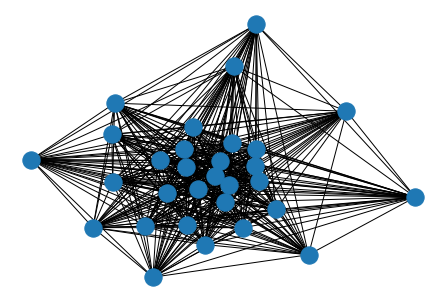

In [491]:
nx.draw_spring(G)

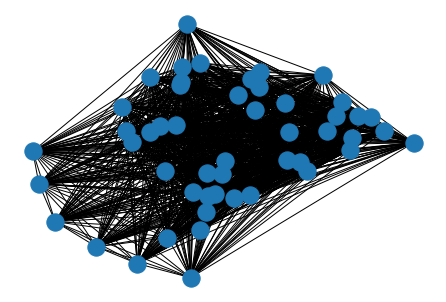

In [492]:
nx.draw_spring(newG)

In [493]:
tvd

,triangle,value
1876,"(Huskies_F2, Huskies_M1, Huskies_M3)",731.0
1150,"(Huskies_D5, Huskies_F2, Huskies_M1)",634.0
267,"(Huskies_D1, Huskies_M1, Huskies_M3)",613.0
1024,"(Huskies_D4, Huskies_M1, Huskies_M3)",603.0
1222,"(Huskies_D5, Huskies_M1, Huskies_M3)",601.0
...,...,...
2203,"(Huskies_M10, Huskies_M11, Huskies_M9)",6.0
883,"(Huskies_D4, Huskies_D6, Huskies_D8)",6.0
584,"(Huskies_D2, Huskies_M10, Huskies_M8)",5.0
892,"(Huskies_D4, Huskies_D6, Huskies_M10)",4.0


In [494]:
min(new_eigenvalue)

1113.0

In [495]:
len(tf)

50

In [496]:
ppd

,i,j,count
0,Huskies_M1,Huskies_F2,182.0
1,Huskies_M3,Huskies_M1,168.0
2,Huskies_M1,Huskies_M3,143.0
3,Huskies_D3,Huskies_G1,120.0
4,Huskies_F2,Huskies_M1,117.0
...,...,...,...
651,Huskies_F5,Huskies_F5,1.0
652,Huskies_D3,Huskies_M10,1.0
653,Huskies_F5,Huskies_D6,1.0
654,Huskies_F5,Huskies_D3,1.0
